<a href="https://colab.research.google.com/github/NeonLabs146/Neural-network/blob/main/Batch_and_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# To see the mapping:
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}


2. using pandas with factorize

In [ ]:
import pandas as pd

# Assuming your dataframe is called 'df'
df['species_encoded'] = pd.factorize(df['species'])[0]

# This creates:
# setosa -> 0
# versicolor -> 1
# virginica -> 2

3. Manual mapping with replace

In [ ]:
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_encoded'] = df['species'].replace(species_mapping)

/tmp/ipython-input-2670761779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species_encoded'] = df['species'].replace(species_mapping)


4. Using map() function

In [ ]:
df['species_encoded'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

5.

In [ ]:
df = df.drop('species',axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [ ]:
X

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [ ]:
y

,species_encoded
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(150, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=3))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8595 - loss: -16.7431 - val_accuracy: 0.0000e+00 - val_loss: -107.5587
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8900 - loss: -12.4394 - val_accuracy: 0.0000e+00 - val_loss: -116.9200
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8256 - loss: -22.0096 - val_accuracy: 0.0000e+00 - val_loss: -126.3062
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8868 - loss: -14.4020 - val_accuracy: 0.0000e+00 - val_loss: -136.6376
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8512 - loss: -21.4525 - val_accuracy: 0.0000e+00 - val_loss: -147.5557
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8682 - loss: -18.8616 - val_accuracy: 0.0000e+00 - val_loss: -159.0963
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8581 - loss: -24.3458 - val_accuracy: 0.0000e+00 - val_loss: -170.9569
Epoch 8/100
120/120 ━━━━━━━━━━━━━━

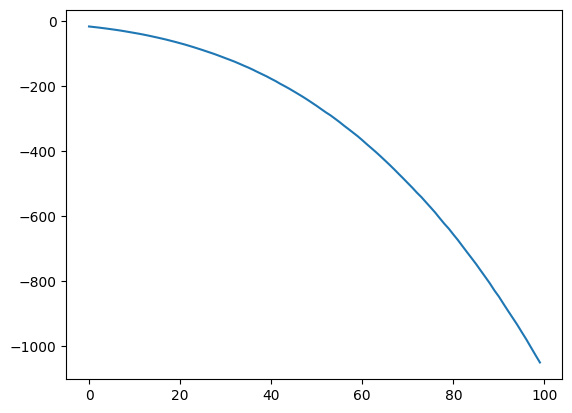

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=3))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7833 - loss: 0.3963 - val_accuracy: 0.0000e+00 - val_loss: -0.2276
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7833 - loss: 0.3771 - val_accuracy: 0.0000e+00 - val_loss: -0.2628
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7917 - loss: 0.3634 - val_accuracy: 0.0000e+00 - val_loss: -0.2911
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8083 - loss: 0.3522 - val_accuracy: 0.0000e+00 - val_loss: -0.3162
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.8167 - loss: 0.3421 - val_accuracy: 0.0000e+00 - val_loss: -0.3393
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8167 - loss: 0.3329 - val_accuracy: 0.0000e+00 - val_loss: -0.3611
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8167 - loss: 0.3242 - val_accuracy: 0.0000e+00 - val_loss: -0.3818
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8167 - loss: 0.3157 - 

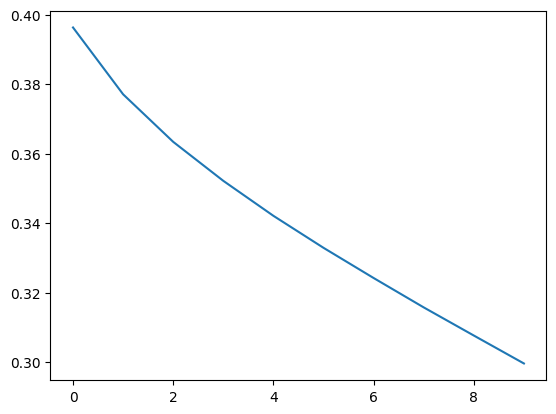

In [ ]:
plt.plot(history.history['loss'])